# Input Embedding 

단어를 컴퓨터가 이해할 수 있는 숫자나 행렬로 변환하는 과정. 한 단어당 n차원의 숫자 벡터로 변환되며 이 벡터는 초기에는 random(학습이 되지 않은 경우)한 수치를 가지나 Training이 진행될 수록 주어진 과제에 따라서 수치를 업데이트 한다.

1.Tokenizer를 통해 문장을 일정한 단위(Token)로 분할 -> 2.분할된 Token에 대해서 정수 인코딩(문장의 시작점과, 문장의 끝 점 padding이 추가됨) 및 \[pad\] 토큰을 사용하여 문장의 길이를 통일-> 3.Token을 n 차원의 숫자 벡터로 변환  

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 9.5 MB/s 
     |████████████████████████████████| 7.6 MB 46.3 MB/s 
     |████████████████████████████████| 163 kB 40.2 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoTokenizer

In [ ]:
# 한국어 tokenizer를 위해서 transformer의 kcbert tokenizer를 사용
# tokeninzer 후 encoding을 위해서 load
tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/619 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/250k [00:00<?, ?B/s]

In [ ]:
print(tokenizer.tokenize('어제 카페 갔었어 거기 사람 많더라'))
print(tokenizer.tokenize('날이 추우니 감기 조심하세요'))

['어제', '카페', '갔', '##었어', '거기', '사람', '많더라']
['날이', '추', '##우니', '감기', '조심하세요']


In [ ]:
# 단어 집합 확인 및 개수 확인
print(sorted(tokenizer.vocab.items(), key=lambda x:x[1])[10000:10100], len(tokenizer.vocab), end = '\n')

[('표창', 10000), ('하지마라', 10001), ('잘하고', 10002), ('##은데', 10003), ('##보다는', 10004), ('##도를', 10005), ('하긴', 10006), ('##보기', 10007), ('##들이나', 10008), ('됩니다', 10009), ('##만도', 10010), ('대해서', 10011), ('유럽', 10012), ('##상황', 10013), ('냄새', 10014), ('좋아하는', 10015), ('##때문', 10016), ('답이다', 10017), ('마세요', 10018), ('##놓은', 10019), ('그러나', 10020), ('뭔지', 10021), ('##레이', 10022), ('몰라', 10023), ('##되서', 10024), ('자신의', 10025), ('##렸다', 10026), ('살기', 10027), ('목사', 10028), ('##길래', 10029), ('이후', 10030), ('##겠어', 10031), ('##한다면', 10032), ('굳이', 10033), ('고마', 10034), ('##일뿐', 10035), ('##이지만', 10036), ('대한민국은', 10037), ('##러워', 10038), ('##지막', 10039), ('의견', 10040), ('국가가', 10041), ('##하셨', 10042), ('물고', 10043), ('통계', 10044), ('나와서', 10045), ('나오면', 10046), ('착각', 10047), ('답이', 10048), ('##바닥', 10049), ('##말을', 10050), ('##타령', 10051), ('##기관', 10052), ('힘을', 10053), ('가정', 10054), ('똑똑', 10055), ('이제와서', 10056), ('많네', 10057), ('단식', 10058), ('죄가', 10059), ('군사', 10060), ('달라', 10061)

In [ ]:
inputs_encoded = []
for raw in ['어제 카페 갔었어 거기 사람 많더라', '날이 추우니 감기 조심하세요']:
  # 정수 인코딩
  encoded = tokenizer.encode(raw)
  print(encoded)
  inputs_encoded.append(torch.tensor(encoded))
print(inputs_encoded)

[2, 9909, 14786, 212, 11320, 8788, 7978, 28026, 3]
[2, 12283, 2933, 16626, 18468, 26874, 3]
[tensor([    2,  9909, 14786,   212, 11320,  8788,  7978, 28026,     3]), tensor([    2, 12283,  2933, 16626, 18468, 26874,     3])]


In [ ]:
# ['어제', '카페', '갔', '##었어', '거기', '사람', '많더라'] -> 7개 Token
# ['날이', '추', '##우니', '감기', '조심하세요'] -> 5개 Token
# 가장 긴 문장을 기준으로 그보다 짧은 문장 뒤에 [pad]토근 0을 넣어주는 과정, 길이를 맞추기 위해
inputs_pad = torch.nn.utils.rnn.pad_sequence(inputs_encoded, batch_first=True, padding_value = 0)

In [ ]:
print(inputs_pad)

tensor([[    2,  9909, 14786,   212, 11320,  8788,  7978, 28026,     3],
        [    2, 12283,  2933, 16626, 18468, 26874,     3,     0,     0]])


In [ ]:
for encoded in inputs_pad:
  print(tokenizer.decode(encoded))

[CLS] 어제 카페 갔었어 거기 사람 많더라 [SEP]
[CLS] 날이 추우니 감기 조심하세요 [SEP] [PAD] [PAD]


In [ ]:
#embedding 
n_vocab = tokenizer.vocab_size #30000 
hidden_size = 512
nn_emb = nn.Embedding(n_vocab, hidden_size)

In [ ]:
# 2문장, [pad]토큰이 포함된 9 토큰을, 512차원으로 임베딩
embeded_inputs = nn_emb(inputs_pad)
print(embeded_inputs, embeded_inputs.size())

tensor([[[ 0.2453,  0.1002, -0.4045,  ..., -0.2416, -1.7429, -0.5138],
         [ 0.8651, -1.8991, -0.4288,  ...,  1.8089, -1.3038,  0.7046],
         [-0.1603, -2.5976, -0.8234,  ...,  0.6745,  0.9004, -0.6700],
         ...,
         [-0.0120, -0.4920, -0.5984,  ..., -1.0441,  0.3192,  1.0632],
         [-0.6287, -0.4934, -1.5713,  ...,  0.2915, -1.0795,  0.0879],
         [-1.2418,  1.1460,  0.8505,  ..., -1.6559,  0.2539, -1.0672]],

        [[ 0.2453,  0.1002, -0.4045,  ..., -0.2416, -1.7429, -0.5138],
         [-0.7219, -0.2318, -0.3234,  ..., -1.4340, -1.3192, -0.4059],
         [ 1.4136,  1.3537,  0.2043,  ...,  1.7810,  0.6985,  1.8714],
         ...,
         [-1.2418,  1.1460,  0.8505,  ..., -1.6559,  0.2539, -1.0672],
         [-0.4819,  0.5667, -0.6906,  ..., -0.7728, -0.8745, -0.7138],
         [-0.4819,  0.5667, -0.6906,  ..., -0.7728, -0.8745, -0.7138]]],
       grad_fn=<EmbeddingBackward0>) torch.Size([2, 9, 512])


# Positional Encording

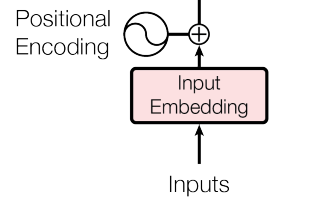

Positional Encording : RNN과 LSTM의 경우 데이터 입력을 순차적으로 받고 계산하기 때문에 연산 속도가 매우 느리다. </br>
Transformer는 이를 개선하기 위해 입력된 문장을 한번에 병렬로 한번에 처리하는데,  **단어의 순서와 위치 정보가 포함되지 않는 문제가 발생**한다. </br> 이를 해결하기 위해 Sin, Cos 함수를 사용하게 된다.

1. 단어의 위치를 더해준다.
- 단순히 단어의 위치를 더해주는 것은 문장이 길어질 수록 위치 값이 커져서 단어의 벡터 값보다 위치 값이 커지는 경우가 생겨 embedding 값이 왜곡될 가능성이 높다. 
2. (현재 위치/ 전체 길이를 더해준다)
- 문장의 길이에 따라 같은 위치에서 같은 역할을 하는 단어의 위치 값이 달라지는 경우가 생긴다.

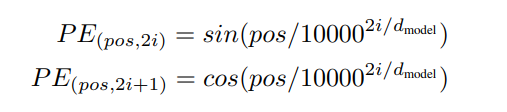

임베딩 차원의 위치가 짝수인 경우 sin함수를, 홀수인 경우는 cos 함수를 더한다.



ex) </br>
position이 0인 경우 : </br>
[sin(0/10000 ^ ((2 * 0)/512)), cos(sin(0/10000 ^ ((2 * 0)/512)), sin(0/10000 ^ ((2 * 1)/512)), cos(0/10000 ^ ((2 * 0)/512))....]

position이 1인 경우 : </br>
[sin(1/10000 ^ ((2 * 0)/512)), cos(sin(1/10000 ^ ((2 * 0)/512)), sin(1/10000 ^ ((2 * 1)/512)), cos(1/10000 ^ ((2 * 0)/512))....]




In [ ]:
# 필요 Library
import numpy as np

In [ ]:
def positional_encoding(n_seq, hiddin_size = 512):
  def calculation(position, i):
    return position / (10000 ** ((2*(i//2))/hiddin_size))
  def postion_angle_vector(position):
    return [calculation(position, i) for i in range(hiddin_size)]
  
  positional_encoding = np.array([postion_angle_vector(pos) for pos in range(n_seq)])
  # 0부터 2개씩 건너뛰면서
  positional_encoding[:, 0::2] = np.sin(positional_encoding[:, 0::2])
  positional_encoding[:, 1::2] = np.cos(positional_encoding[:, 1::2])

  return positional_encoding

In [ ]:
# 토큰의 개수가 128개인 경우 (hiden_size는 논문에 의하면 512로 정해져 있다.)
print(positional_encoding(128), positional_encoding(128).shape)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  8.21856190e-01 ...  9.99999994e-01
   1.03663293e-04  9.99999995e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.36414739e-01 ...  9.99999977e-01
   2.07326584e-04  9.99999979e-01]
 ...
 [-6.16040459e-01  7.87714512e-01  9.32827406e-01 ...  9.99909784e-01
   1.29575490e-02  9.99916047e-01]
 [ 3.29990826e-01  9.43984139e-01  8.27561223e-01 ...  9.99908335e-01
   1.30612035e-02  9.99914699e-01]
 [ 9.72630067e-01  2.32359102e-01  1.00875902e-02 ...  9.99906874e-01
   1.31648579e-02  9.99913340e-01]] (128, 512)


In [ ]:
# 문장의 개수 * 토큰 개수 만큼 position array를 만들어준다.
position = torch.arange(inputs_pad.size(1)).expand(embeded_inputs.size(0), inputs_pad.size(1))

In [ ]:
print(position)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8],
        [0, 1, 2, 3, 4, 5, 6, 7, 8]])


In [ ]:
pos_encoding = torch.FloatTensor(positional_encoding(128))
pos_embedding = nn.Embedding.from_pretrained(pos_encoding, freeze = True)

In [ ]:
# 128 토큰의 position_encoding을 가지고 있는 문장에 맞춰 [2, 9, 512] 사이즈로 만드는 방법
# [9, 512] sin, cos 함수를 이용한 위치 Positional Encoding 값이 각각 문장 개수 별로 들어가 있다.
print(pos_embedding(position), pos_embedding(position).size())

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  8.2186e-01,  ...,  1.0000e+00,
           1.0366e-04,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  9.3641e-01,  ...,  1.0000e+00,
           2.0733e-04,  1.0000e+00],
         ...,
         [-2.7942e-01,  9.6017e-01, -4.7522e-01,  ...,  1.0000e+00,
           6.2198e-04,  1.0000e+00],
         [ 6.5699e-01,  7.5390e-01,  4.5239e-01,  ...,  1.0000e+00,
           7.2564e-04,  1.0000e+00],
         [ 9.8936e-01, -1.4550e-01,  9.9067e-01,  ...,  1.0000e+00,
           8.2931e-04,  1.0000e+00]],

        [[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  8.2186e-01,  ...,  1.0000e+00,
           1.0366e-04,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  9.3641e-01,  ...,  1.0000e+00,
           2.0733e-04,  1.0000e+00],
         ...,
         [-2.7942e-01,  9

Input Embdding 후 Positional Encoding을 더해주는 과정 완료

In [ ]:
encode_input = embeded_inputs + pos_embedding(position)

In [ ]:
print(encode_input, encode_input.size())

tensor([[[ 0.2453,  1.1002, -0.4045,  ...,  0.7584, -1.7429,  0.4862],
         [ 1.7065, -1.3588,  0.3930,  ...,  2.8089, -1.3037,  1.7046],
         [ 0.7490, -3.0138,  0.1131,  ...,  1.6745,  0.9006,  0.3300],
         ...,
         [-0.2914,  0.4682, -1.0736,  ..., -0.0441,  0.3199,  2.0632],
         [ 0.0283,  0.2605, -1.1189,  ...,  1.2915, -1.0787,  1.0879],
         [-0.2524,  1.0005,  1.8412,  ..., -0.6559,  0.2547, -0.0672]],

        [[ 0.2453,  1.1002, -0.4045,  ...,  0.7584, -1.7429,  0.4862],
         [ 0.1196,  0.3085,  0.4985,  ..., -0.4340, -1.3191,  0.5941],
         [ 2.3229,  0.9375,  1.1407,  ...,  2.7810,  0.6987,  2.8714],
         ...,
         [-1.5212,  2.1062,  0.3753,  ..., -0.6559,  0.2545, -0.0672],
         [ 0.1751,  1.3206, -0.2382,  ...,  0.2272, -0.8738,  0.2862],
         [ 0.5075,  0.4212,  0.3001,  ...,  0.2272, -0.8737,  0.2862]]],
       grad_fn=<AddBackward0>) torch.Size([2, 9, 512])


# Positional Encoding Define

In [ ]:
# 해당 과정을 한번에 처리할 수 있는 함수
def mk_encoder_input(input, n_seq = 128, hiddin_size = 512):
  def encoding_input(input):
    inputs_encoded = []
    for raw in input:
      encoded = tokenizer.encode(raw)
      inputs_encoded.append(torch.tensor(encoded))
    inputs_pad = torch.nn.utils.rnn.pad_sequence(inputs_encoded, batch_first=True, padding_value = 0)
    return inputs_pad

  def embedding_input(inputs_encoded):
    n_vocab = tokenizer.vocab_size #30000 
    hidden_size = 512
    nn_emb = nn.Embedding(n_vocab, hidden_size)
    embeded_inputs = nn_emb(inputs_pad)
    
    return embeded_inputs

  #ex) position이 0일때, i : 0~512까지의 pos/(10000 ** (2i/d_model))을 계산해준다.
  def calculation(position, i):
    return position / (10000 ** ((2*(i//2))/hiddin_size))

  def postion_angle_vector(position):
      return [calculation(position, i) for i in range(hiddin_size)]

  encoded = encoding_input(input)
  embedded = embedding_input(encoded)

  position = torch.arange(embedded.size(1)).expand(embedded.size(0), embedded.size(1))
  positional_encoding = np.array([postion_angle_vector(pos) for pos in range(n_seq)])
  positional_encoding[:, 0::2] = np.sin(positional_encoding[:, 0::2])
  positional_encoding[:, 1::2] = np.cos(positional_encoding[:, 1::2])

  pos_encoding = torch.FloatTensor(positional_encoding)
  pos_embedding = nn.Embedding.from_pretrained(pos_encoding, freeze = True)
  pos_enc = pos_embedding(position)

  # inputs_encoded는 attention mask를 만들기 위해 사용된다.
  return inputs_pad, embedded + pos_enc

In [ ]:
# Embedding은 초기에는 임의의 값을 가지고 훈련이 지속되면서 업데이트 되므로, 해당 함수는 실행할 때 마다 결과가 다르다.
mk_encoder_input(['어제 카페 갔었어 거기 사람 많더라', '날이 추우니 감기 조심하세요'])

(tensor([[    2,  9909, 14786,   212, 11320,  8788,  7978, 28026,     3],
         [    2, 12283,  2933, 16626, 18468, 26874,     3,     0,     0]]),
 tensor([[[ 5.2249e-01,  2.4457e+00, -5.5455e-01,  ...,  3.1429e+00,
            1.6904e+00,  1.0134e+00],
          [-4.7217e-01,  3.8983e-01,  1.1183e+00,  ...,  3.1506e+00,
            1.9815e-01,  1.6348e-01],
          [-8.5531e-01, -3.2104e-01,  1.4364e+00,  ..., -9.4942e-01,
           -1.1474e+00,  2.9921e+00],
          ...,
          [-5.2346e-02, -1.2233e+00, -7.8969e-01,  ...,  8.1560e-02,
            5.4286e-01,  2.2006e+00],
          [ 3.0088e+00,  1.0414e+00,  4.2388e-01,  ...,  1.3594e+00,
           -4.9535e-01,  1.1524e+00],
          [ 1.9173e+00, -1.4202e+00, -2.2984e-01,  ...,  9.6196e-01,
            1.8959e-01,  1.8784e+00]],
 
         [[ 5.2249e-01,  2.4457e+00, -5.5455e-01,  ...,  3.1429e+00,
            1.6904e+00,  1.0134e+00],
          [ 8.0578e-01, -8.3114e-01,  7.3612e-01,  ...,  4.2523e-01,
           -1.

# Positional Encoding from Pytorch Tutorial

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        # x.size = (batch, payload, embed or channel)
        x = x + self.pe[:x.size(1)].expand(x.size(0), x.size(1), x.size(2))
        # x = x + self.pe[:x.size(1)]
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
            batch_first x : Tensor, shape [batch_size, seq_len, embedding_dim]
        """
        return self.dropout(x)

* https://pytorch.org/tutorials/beginner/transformer_tutorial.html